## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [4]:
#写入代码
X = pd.read_csv("/content/clear_data.csv")
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,2,3,26.0,0,0,7.9250,1,0,0,0,1
3,3,1,35.0,1,0,53.1000,1,0,0,0,1
4,4,3,35.0,0,0,8.0500,0,1,0,0,1


In [5]:
#写入代码
y = pd.read_csv("/content/train.csv")["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
#写入代码
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,random_state = 0)

In [7]:
#写入代码
X_train.info(),y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 671 to 80
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Age          668 non-null    float64
 3   SibSp        668 non-null    int64  
 4   Parch        668 non-null    int64  
 5   Fare         668 non-null    float64
 6   Sex_female   668 non-null    int64  
 7   Sex_male     668 non-null    int64  
 8   Embarked_C   668 non-null    int64  
 9   Embarked_Q   668 non-null    int64  
 10  Embarked_S   668 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 62.6 KB


(None,
 671    0
 417    1
 634    0
 323    1
 379    0
       ..
 131    0
 490    0
 528    0
 48     0
 80     0
 Name: Survived, Length: 668, dtype: int64)

In [8]:
X_train.dtypes,y_train.dtypes

(PassengerId      int64
 Pclass           int64
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 Sex_female       int64
 Sex_male         int64
 Embarked_C       int64
 Embarked_Q       int64
 Embarked_S       int64
 dtype: object,
 dtype('int64'))

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [11]:
print("Training set score:{:.2f}".format(rfc.score(X_train, y_train)))
print("Training set score:{:.2f}".format(rfc.score(X_test, y_test)))

Training set score:0.87
Training set score:0.82


### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结

In [ ]:
#思考回答：

#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

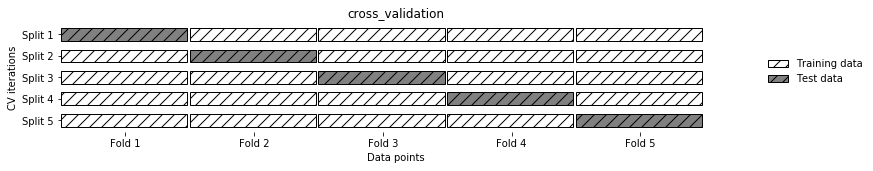

In [ ]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score

In [12]:
#写入代码
from sklearn.model_selection import cross_val_score

In [13]:
#写入代码
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
scores = cross_val_score(rfc, X_train, y_train, cv=10)#确定交叉验证拆分策略。cv=None,使用默认的5折交叉验证

In [14]:
#写入代码
#k折交叉验证分数
scores

array([0.85074627, 0.79104478, 0.85074627, 0.7761194 , 0.82089552,
       0.8358209 , 0.79104478, 0.7761194 , 0.77272727, 0.77272727])

In [15]:
#写入代码
#平均交叉验证分数
print("Average cross-validation score:{:.2f}".format(scores.mean()))

Average cross-validation score:0.80


#### 思考4
* k折越多的情况下会带来什么样的影响？

In [ ]:
#思考回答
'''
答：k折越多，每次训练时的训练集数据越多，测试集数据越少。
数据充分的训练集拟合效果可能越好，且训练次数越多，评估结果的稳定性和保真性越高
此外，折数过多意味着训练的次数多，且数据量大的情况下单次训练的时间也会变长，即复杂度会变高。
'''

#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

In [ ]:
#思考回答
'''
答：这个在之前【吃瓜教程】中学习过，
具体看https://blog.csdn.net/sinat_33209811/article/details/125755163
'''

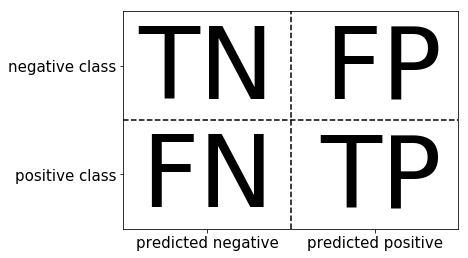

In [ ]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

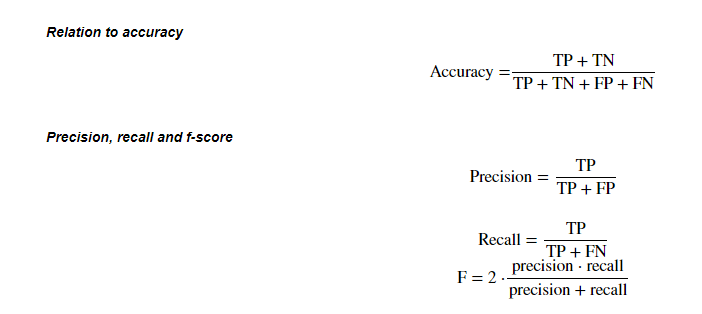

In [ ]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix

* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report

In [16]:
#写入代码
from sklearn.metrics import confusion_matrix

In [17]:
#写入代码
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [18]:
#写入代码
pred = rfc.predict(X_train)

In [19]:
#写入代码
confusion_matrix(y_train, pred)

array([[384,  28],
       [ 68, 188]])

In [20]:
from sklearn.metrics import classification_report

In [21]:
#精确率，召回率以及f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       412
           1       0.87      0.73      0.80       256

    accuracy                           0.86       668
   macro avg       0.86      0.83      0.84       668
weighted avg       0.86      0.86      0.85       668



【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

In [ ]:
#思考回答
# https://blog.csdn.net/zhangxiaohua18/article/details/122311808

#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是ROC曲线，OCR曲线的存在是为了解决什么问题？

In [ ]:
#思考
# https://blog.csdn.net/sinat_33209811/article/details/125755163

#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn.metrics.roc_curve
* ROC曲线下面所包围的面积越大越好

In [22]:
#写入代码
from sklearn.metrics import roc_curve

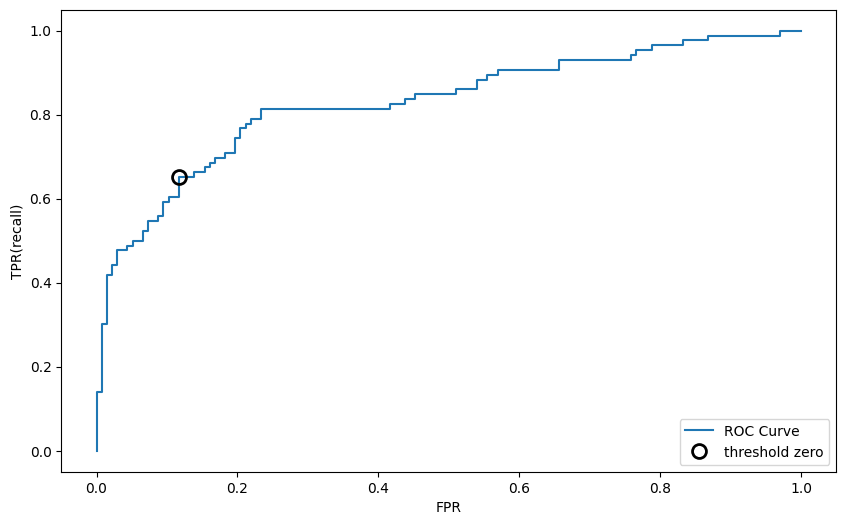

In [23]:
#写入代码
fpr,tpr,thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
#找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c='k',mew=2)
plt.legend(loc=4)

#### 思考6
* 对于多分类问题如何绘制ROC曲线

In [ ]:
#思考回答


【思考】你能从这条OCR曲线的到什么信息？这些信息可以做什么？

In [ ]:
#思考回答
